## HW1 - generate block simulation data and solve for the parameters

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MatrixMethods as mm
from SingleImage import SingleImage
from ImageBlock import ImageBlock
from BlockSimulation import *
from scipy import linalg as la
from functools import partial


# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

## Part 1 - Simulate block of images

In [7]:
# define random seed
np.random.seed(0)

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=10, tie_pattern='4 corners', control_pattern='random block',num_control_points=5, rotaions_sigma=10, altitude=1000)

block = a.simulate_block()

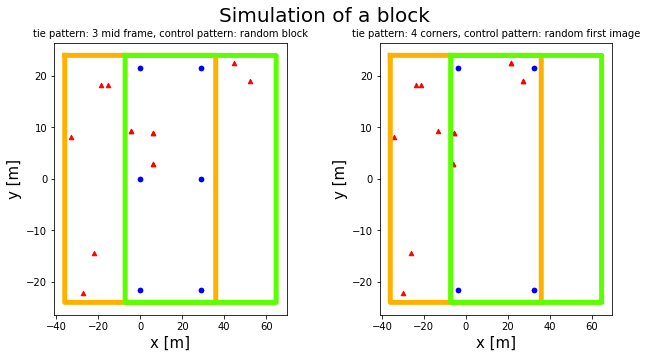

In [8]:
# define random seed
np.random.seed(1)

# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Simulation of a block', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=10, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[0])
# add title to the plot usimg the parameters of the simulation
axes[0].set_title('tie pattern: 3 mid frame, control pattern: random block', fontsize=10)
axes[0].set_xlabel('x [m]', fontsize=15)
axes[0].set_ylabel('y [m]', fontsize=15)
# axes[0].axis('equal')

np.random.seed(1)
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='4 corners', control_pattern='random first image',num_control_points=10, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[1])
axes[1].set_title('tie pattern: 4 corners, control pattern: random first image', fontsize=10)
axes[1].set_xlabel('x [m]', fontsize=15)
axes[1].set_ylabel('y [m]', fontsize=15)
# axes[1].axis('equal')

plt.show()
fig.savefig('Simulation of a block.png')


Text(0, 0.5, 'y [m]')

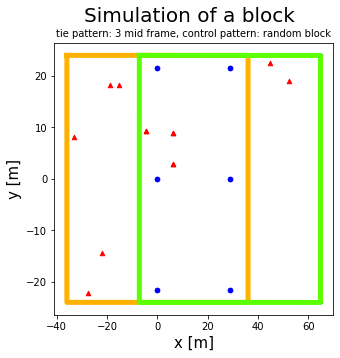

In [9]:
# define random seed
np.random.seed(1)

# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('Simulation of a block', fontsize=20)


a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=10, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes)
# add title to the plot usimg the parameters of the simulation
axes.set_title('tie pattern: 3 mid frame, control pattern: random block', fontsize=10)
axes.set_xlabel('x [m]', fontsize=15)
axes.set_ylabel('y [m]', fontsize=15)

In [10]:
block.block_points.to_excel('block_points.xlsx')

In [11]:
EOP = block.describe_block()
EOP.to_excel('EOP.xlsx')

Images EOP:
   Image    X0   Y0     Z0      omega       phi      kappa
0    0.0   0.0  0.0  100.0  16.243454 -6.117564  -5.281718
1    1.0  28.8  0.0  100.0 -10.729686  8.654076 -23.015387

Tie points:
   x     y name image_id          X          Y    Z  num_images
0  0 -10.8   T0        0   0.002413 -21.591758  0.0           2
1  0   0.0   T1        0   0.002966   0.007875  0.0           2
2  0  10.8   T2        0   0.003519  21.608243  0.0           2
3  0 -10.8   T0        1  28.793394 -21.605445  0.0           2
4  0   0.0   T1        1  28.795804  -0.005202  0.0           2
5  0  10.8   T2        1  28.798215  21.594555  0.0           2

Control points:
           X          Y name  Z
0   6.255662   8.893817   C0  0
1 -15.389114  18.156419   C1  0
2 -33.236205   8.185454   C2  0
3   6.065190   2.818096   C3  0
4 -21.846526 -14.496689   C4  0
5  44.713696  22.484974   C5  0
6  -4.405375   9.234895   C6  0
7  52.338232  18.948201   C7  0
8 -27.424752 -22.133818   C8  0
9 -18.878793 

## Part 2 - Bundle Adjustment

In [12]:
SimulateBlock.add_noise_to_block(block, sigma_location=0.5, sigma_rotation=100, sigma_image_points=1, sigma_tie_points=0.5)
EOP = block.describe_block()

Images EOP:
   Image         X0        Y0         Z0      omega         phi       kappa
0    0.0   0.165399  0.570971  99.435202  69.624545  -15.314894  186.100321
1    1.0  28.879257  0.436709  99.944308 -95.734924  104.736077  -44.757204

Tie points:
          x          y name image_id          X          Y         Z   
0  0.000683 -10.799977   T0        0  -0.516607 -22.096498 -0.529128  \
1  0.000857   0.000184   T1        0   0.331108  -0.023371 -0.869327   
2 -0.000416  10.801250   T2        0   0.055101  21.297409  0.137859   
3  0.001248 -10.800758   T0        1  28.248057 -21.910437  0.153206   
4  0.000588   0.000347   T1        1  29.641717  -0.379179 -0.290399   
5  0.001367  10.800674   T2        1  28.742838  22.615570  0.223760   

   num_images  
0           2  
1           2  
2           2  
3           2  
4           2  
5           2  

Control points:
           X          Y name  Z
0   6.255662   8.893817   C0  0
1 -15.389114  18.156419   C1  0
2 -33.236205   8.

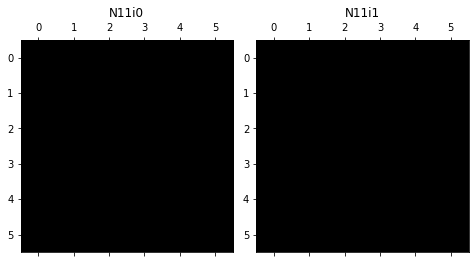

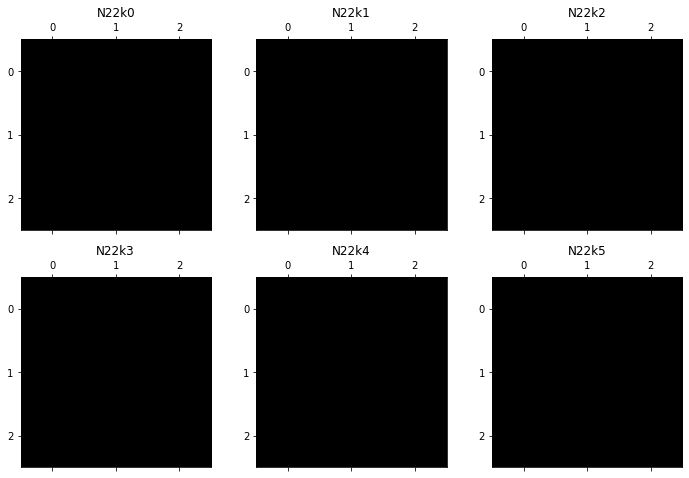

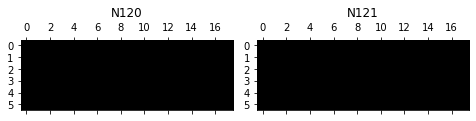

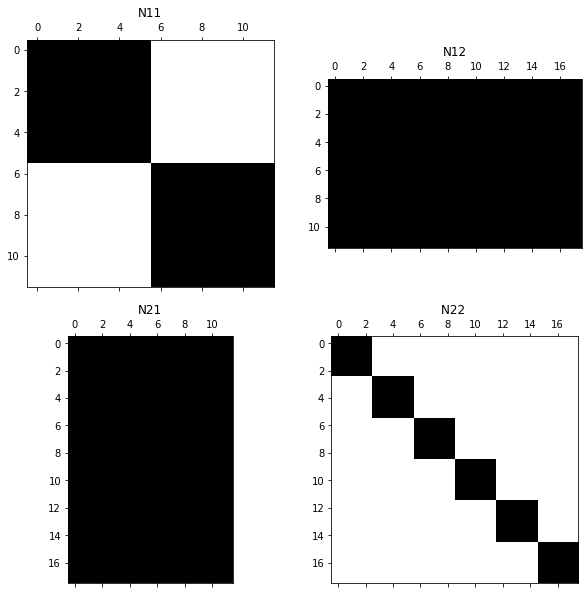

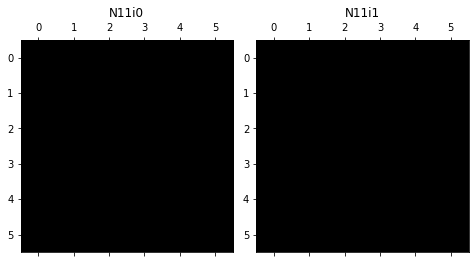

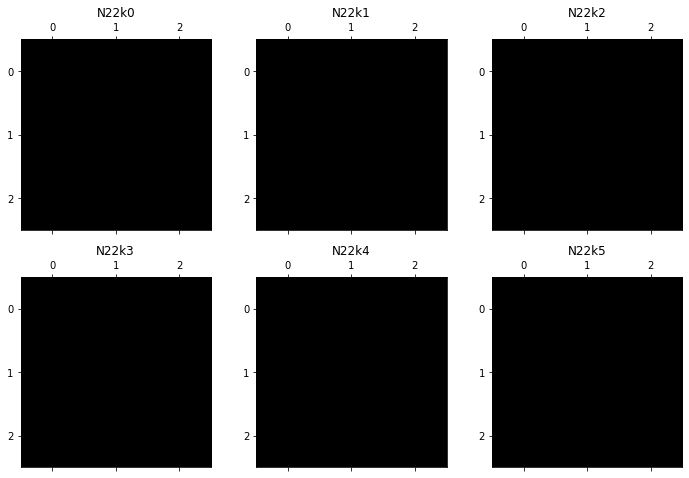

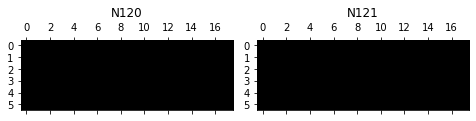

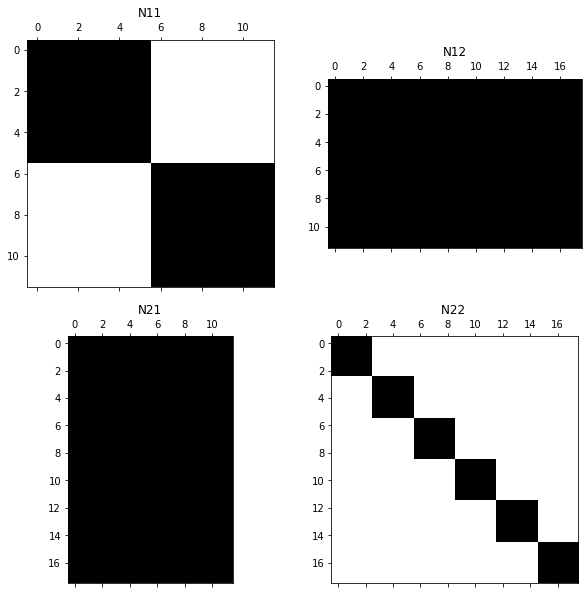

In [13]:
X,RMSE = block.BundleAdjustment(0.01,100,method = 'schur', plotNormal=True)

In [14]:
block.describe_block()

Images EOP:
   Image            X0            Y0     Z0      omega       phi      kappa
0    0.0  7.046253e-08  5.398220e-08  100.0  16.243512 -6.117576  -5.281660
1    1.0  2.880000e+01 -1.841388e-08  100.0 -10.729650  8.654060 -23.015389

Tie points:
          x          y name image_id          X          Y         Z   
0  0.000683 -10.799977   T0        0  -0.516632 -22.096552 -0.529419  \
1  0.000857   0.000184   T1        0   0.331097  -0.023370 -0.869406   
2 -0.000416  10.801250   T2        0   0.055101  21.297381  0.137987   
3  0.001248 -10.800758   T0        1  28.248146 -21.910559  0.152544   
4  0.000588   0.000347   T1        1  29.641755  -0.379175 -0.290792   
5  0.001367  10.800674   T2        1  28.742824  22.615592  0.223630   

   num_images  
0           2  
1           2  
2           2  
3           2  
4           2  
5           2  

Control points:
           X          Y name  Z
0   6.255662   8.893817   C0  0
1 -15.389114  18.156419   C1  0
2 -33.236205   8.

,Image,X0,Y0,Z0,omega,phi,kappa
0,0.0,7.046253e-08,5.398220e-08,100.0,16.243512,-6.117576,-5.281660
1,1.0,2.880000e+01,-1.841388e-08,100.0,-10.729650,8.654060,-23.015389


## Test the Bundle Adjustment methods

In [15]:
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=10, rotaions_sigma=10, altitude=100)


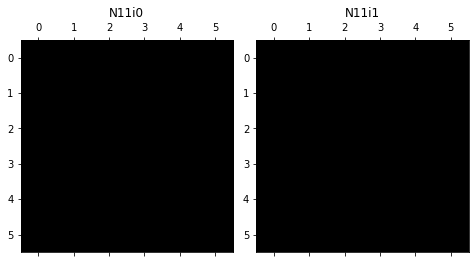

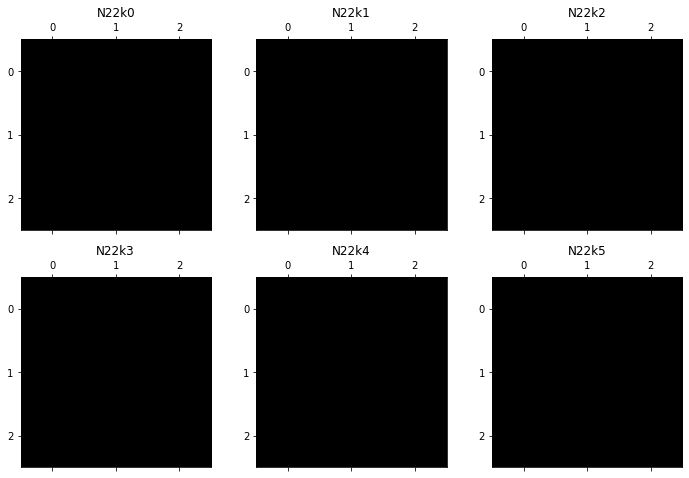

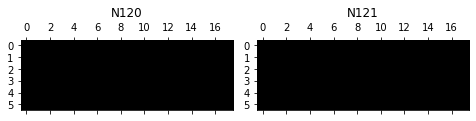

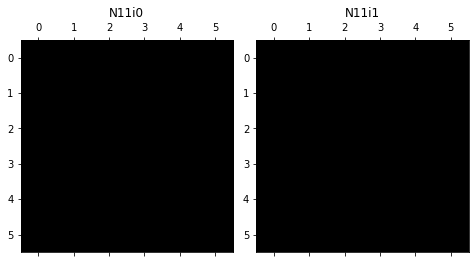

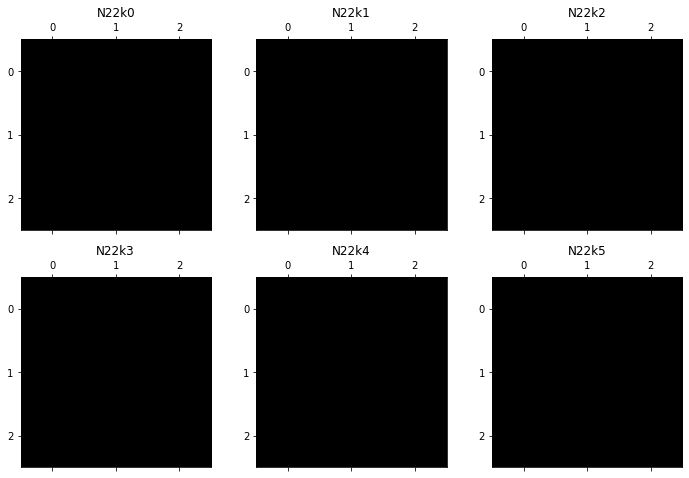

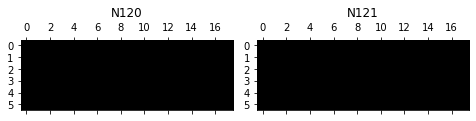

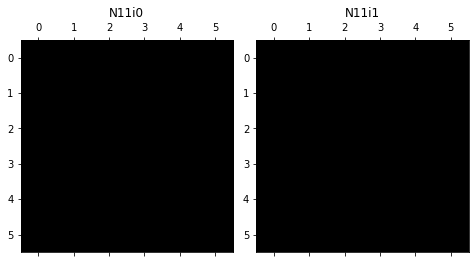

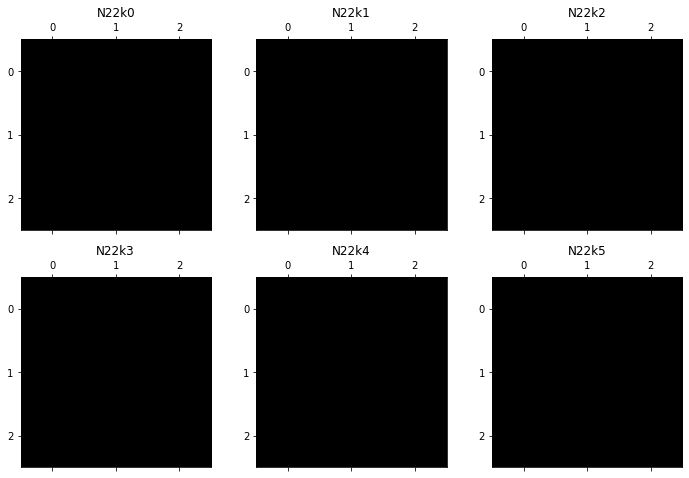

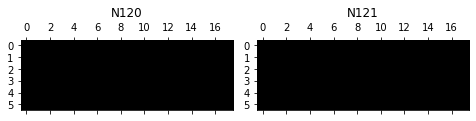

Average running time for 'schur' method: 6.682853937149048
Average running time for 'naive' method: 0.0239865779876709


In [16]:
import time

# Number of times to run each method
num_runs = 1

# Run and measure the average running time for 'schur' method
total_time_schur = 0
for _ in range(num_runs):
    # Simulate the block and add noise
    a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=10, rotaions_sigma=10, altitude=100)
    block = a.simulate_block()
    SimulateBlock.add_noise_to_block(block, sigma_location=0.5, sigma_rotation=100, sigma_image_points=1, sigma_tie_points=0.5)
    start_time = time.time()
    X_schur, RMSE_schur = block.BundleAdjustment(0.01, 100, method='schur')
    end_time = time.time()
    running_time_schur = end_time - start_time
    total_time_schur += running_time_schur
average_time_schur = total_time_schur / num_runs

# Run and measure the average running time for 'naive' method
total_time_naive = 0
for _ in range(num_runs):
    a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=10, rotaions_sigma=10, altitude=100)
    block = a.simulate_block()
    SimulateBlock.add_noise_to_block(block, sigma_location=0.5, sigma_rotation=100, sigma_image_points=1, sigma_tie_points=0.5)
    start_time = time.time()
    X_naive, RMSE_naive = block.BundleAdjustment(0.01, 100, method='naive')
    end_time = time.time()
    running_time_naive = end_time - start_time
    total_time_naive += running_time_naive
average_time_naive = total_time_naive / num_runs

# Compare the average running times
print("Average running time for 'schur' method:", average_time_schur)
print("Average running time for 'naive' method:", average_time_naive)
